## First Assigment Of Autonomous Robots

### 1- Plot time series for Accelerometer and Magnetometer

In [25]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### 1-1 read datas and plot time series

In [12]:
df_accelerometer = pd.read_csv('Accelerometer.csv')
df_accelerometer.head()

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2)
0,0.000000,-2.464831,6.420052,6.683414
1,0.009942,-2.493561,6.410475,6.688202
2,0.019982,-2.464831,6.410475,6.692991
3,0.029994,-2.460042,6.415264,6.702568
4,0.039929,-2.450465,6.420052,6.707356


In [13]:
df_accelerometer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3596 entries, 0 to 3595
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time (s)                3596 non-null   float64
 1   Acceleration x (m/s^2)  3596 non-null   float64
 2   Acceleration y (m/s^2)  3596 non-null   float64
 3   Acceleration z (m/s^2)  3596 non-null   float64
dtypes: float64(4)
memory usage: 112.5 KB


In [14]:
df_accelerometer.shape

(3596, 4)

In [15]:
df_accelerometer.describe()

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2)
count,3596.000000,3596.000000,3596.000000,3596.000000
mean,17.980862,-2.481001,6.408646,6.671713
std,10.382846,0.028767,0.026185,0.030187
min,0.000000,-2.574964,6.252458,6.367379
25%,8.990630,-2.503138,6.391322,6.649895
50%,17.980560,-2.479196,6.410475,6.673837
75%,26.971608,-2.455254,6.429629,6.688202
max,35.961629,-2.373851,6.487090,7.018602


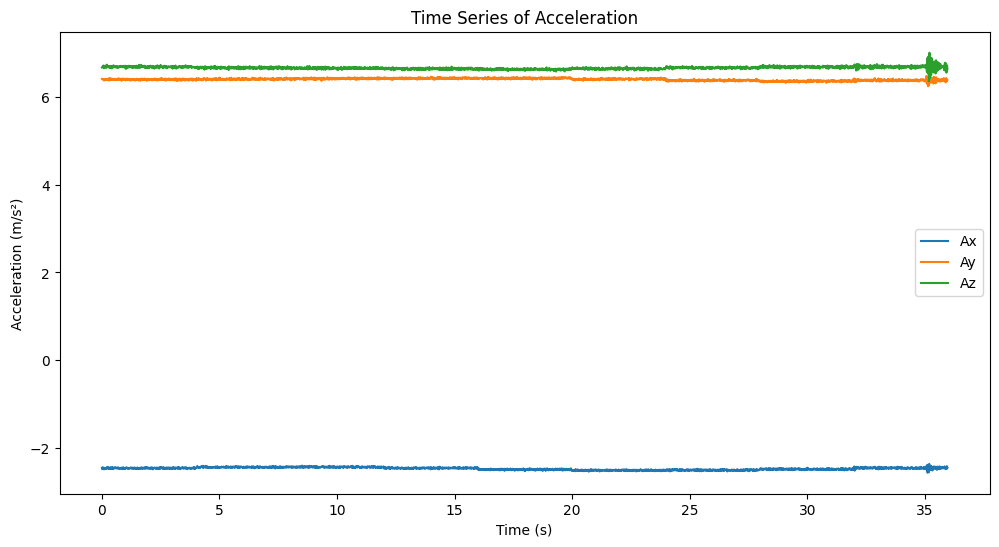

In [30]:
plt.figure(figsize=(12, 6))

sns.lineplot(x='Time (s)', y='Acceleration x (m/s^2)', data=df_accelerometer, label='Ax')
sns.lineplot(x='Time (s)', y='Acceleration y (m/s^2)', data=df_accelerometer, label='Ay')
sns.lineplot(x='Time (s)', y='Acceleration z (m/s^2)', data=df_accelerometer, label='Az')

plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.title('Time Series of Acceleration')
plt.legend()

plt.show()

In [26]:
df_magnetometer = pd.read_csv('Magnetometer.csv')
df_magnetometer.head()

,Time (s),Magnetic field x (µT),Magnetic field y (µT),Magnetic field z (µT)
0,0.000000,-1.799999,-56.800003,-35.200001
1,0.009603,-1.400000,-56.699997,-34.900002
2,0.019622,-1.299999,-56.699997,-35.200001
3,0.029642,-1.200001,-56.699997,-35.299999
4,0.039577,-1.299999,-56.699997,-35.400002


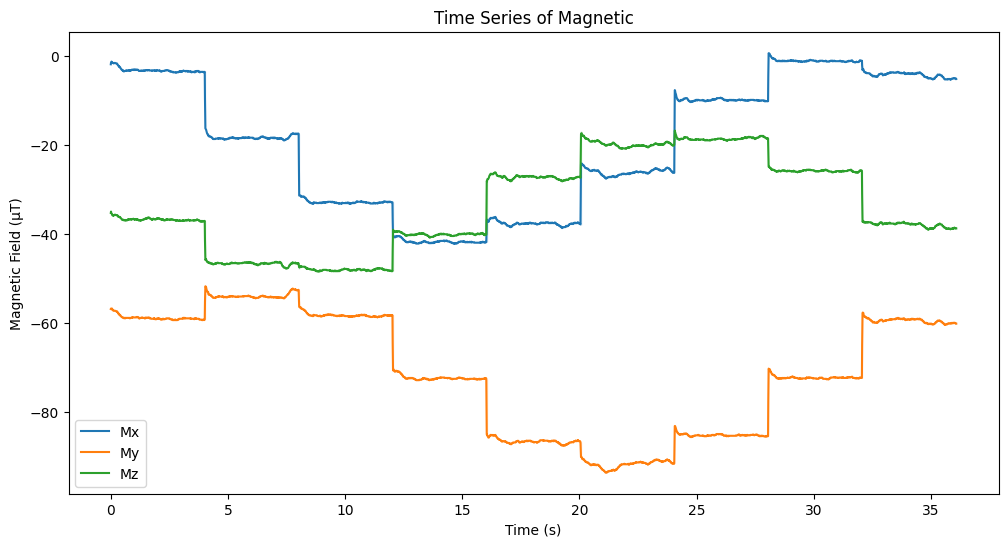

In [31]:
plt.figure(figsize=(12, 6))

sns.lineplot(x='Time (s)', y='Magnetic field x (µT)', data=df_magnetometer, label='Mx')
sns.lineplot(x='Time (s)', y='Magnetic field y (µT)', data=df_magnetometer, label='My')
sns.lineplot(x='Time (s)', y='Magnetic field z (µT)', data=df_magnetometer, label='Mz')

plt.xlabel('Time (s)')
plt.ylabel('Magnetic Field (µT)')
plt.title('Time Series of Magnetic')
plt.legend()

plt.show()

### 1-2 Calculate roll, pitch and yaw Angels and plot them

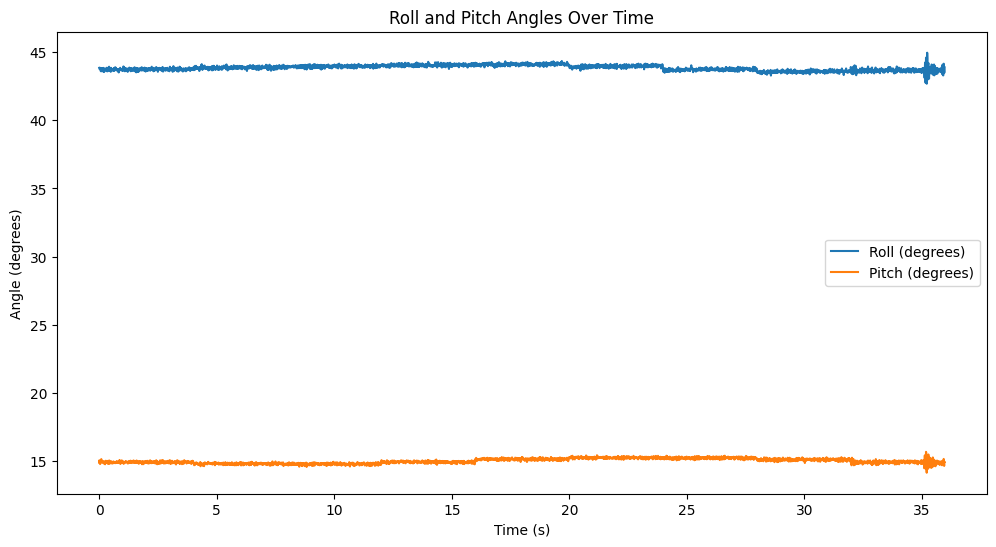

In [38]:
df_accelerometer['Roll'] = np.degrees(np.arctan2(df_accelerometer['Acceleration y (m/s^2)'], df_accelerometer['Acceleration z (m/s^2)']))
df_accelerometer['Pitch'] = np.degrees(np.arctan2(-df_accelerometer['Acceleration x (m/s^2)'], 
                                       np.sqrt(df_accelerometer['Acceleration y (m/s^2)']**2 + df_accelerometer['Acceleration z (m/s^2)']**2)))

plt.figure(figsize=(12, 6))

sns.lineplot(x='Time (s)', y='Roll', data=df_accelerometer, label='Roll (degrees)')
sns.lineplot(x='Time (s)', y='Pitch', data=df_accelerometer, label='Pitch (degrees)')

# Set plot labels and title
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Roll and Pitch Angles Over Time')
plt.legend()
plt.show()

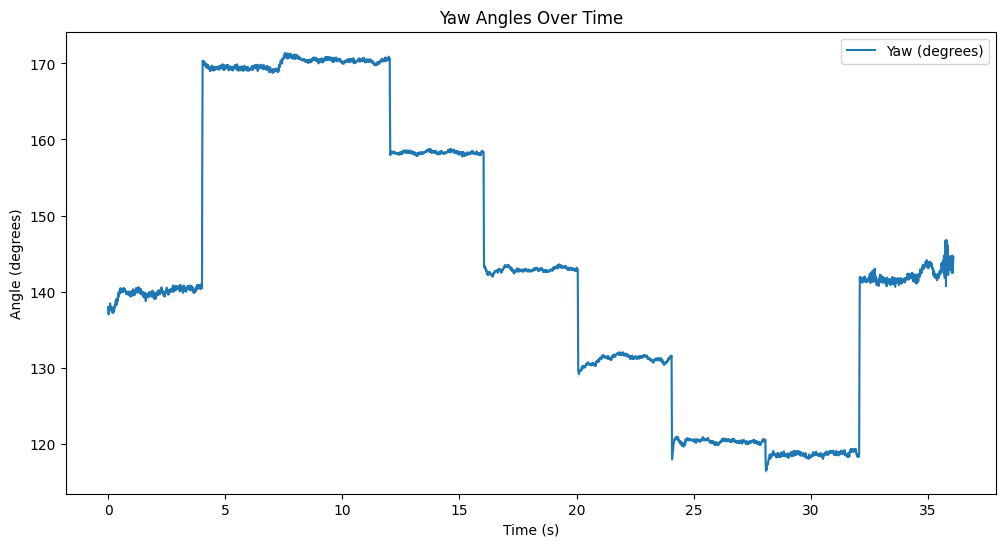

In [36]:
df_accelerometer['Roll'] = np.radians(df_accelerometer['Roll'])
df_accelerometer['Pitch'] = np.radians(df_accelerometer['Pitch'])

df_magnetometer['Yaw'] = np.degrees(np.arctan2(
        df_magnetometer['Magnetic field z (µT)'] * np.sin(df_accelerometer['Roll']) - df_magnetometer['Magnetic field y (µT)'] * np.cos(df_accelerometer['Roll']),
        df_magnetometer['Magnetic field x (µT)'] * np.cos(df_accelerometer['Pitch']) + np.sin(df_accelerometer['Pitch']) * (df_magnetometer['Magnetic field y (µT)'] * np.sin(df_accelerometer['Roll']) + df_magnetometer['Magnetic field z (µT)'] * np.cos(df_accelerometer['Roll']))
    ))

plt.figure(figsize=(12, 6))

sns.lineplot(x='Time (s)', y='Yaw', data=df_magnetometer, label='Yaw (degrees)')

# Set plot labels and title
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Yaw Angles Over Time')
plt.legend()
plt.show()

### 2- Working with Pyphox Application

In [39]:
df_accelerometer = pd.read_csv('mydata\Acceleration.csv')
df_accelerometer.head()

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.034017,-0.770788,-0.112463,9.894919,9.925532
1,0.036447,-0.792323,-0.095713,9.899706,9.931823
2,0.038877,-0.782752,-0.093320,9.887741,9.919115
3,0.041307,-0.768395,-0.088534,9.902099,9.932262
4,0.043737,-0.785145,-0.088534,9.914062,9.945498


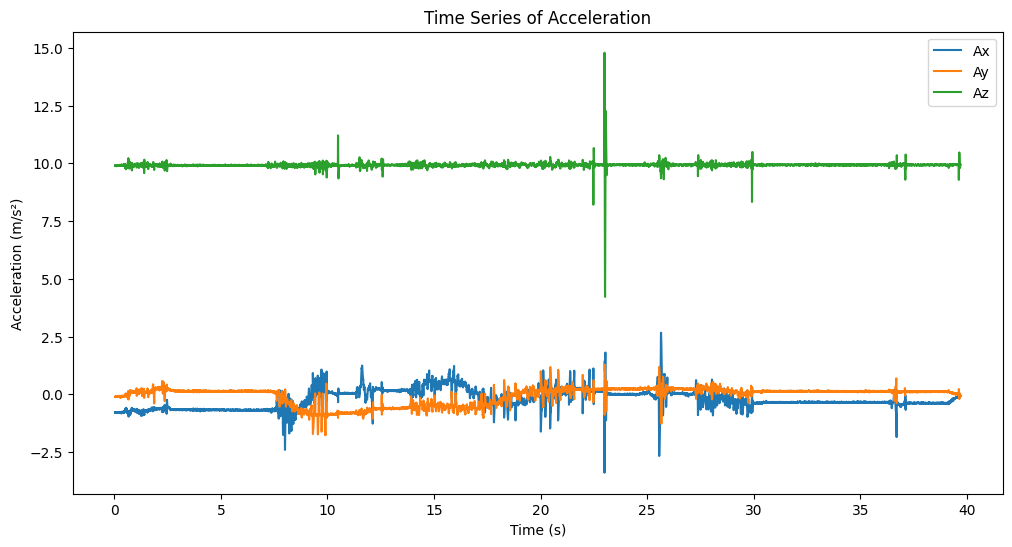

In [40]:
plt.figure(figsize=(12, 6))

sns.lineplot(x='Time (s)', y='Acceleration x (m/s^2)', data=df_accelerometer, label='Ax')
sns.lineplot(x='Time (s)', y='Acceleration y (m/s^2)', data=df_accelerometer, label='Ay')
sns.lineplot(x='Time (s)', y='Acceleration z (m/s^2)', data=df_accelerometer, label='Az')

plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.title('Time Series of Acceleration')
plt.legend()

plt.show()

In [41]:
df_magnetometer = pd.read_csv('mydata\Magnetometer.csv')
df_magnetometer.head()

,Time (s),Magnetic Field x (µT),Magnetic Field y (µT),Magnetic Field z (µT),Absolute field (µT)
0,0.026441,-2.58750,9.768750,-19.031250,21.547903
1,0.036441,-2.51250,9.843750,-18.806252,21.374919
2,0.046441,-2.32500,9.618751,-19.181252,21.583475
3,0.056441,-2.43750,9.506250,-18.918751,21.312657
4,0.066441,-2.68125,9.618751,-18.937500,21.408839


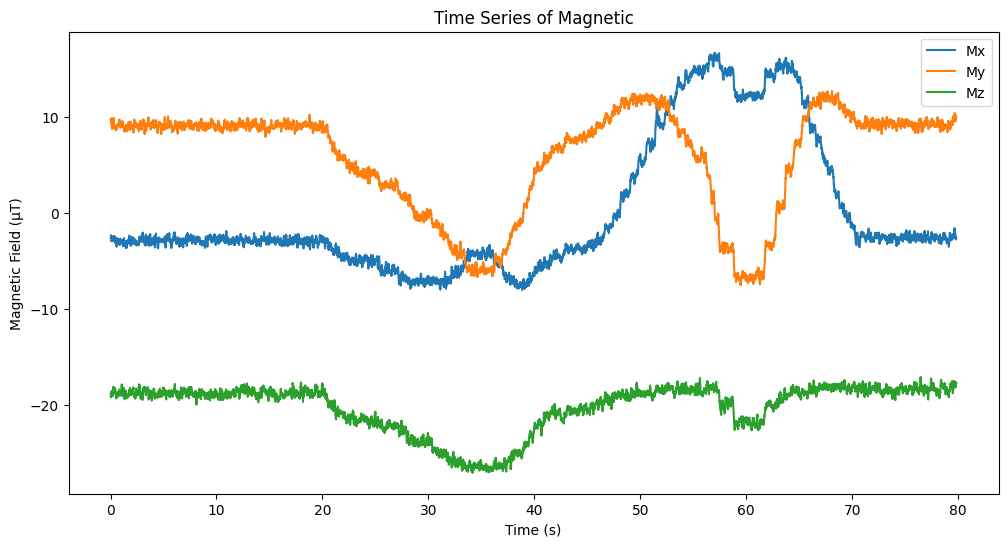

In [43]:
plt.figure(figsize=(12, 6))

sns.lineplot(x='Time (s)', y='Magnetic Field x (µT)', data=df_magnetometer, label='Mx')
sns.lineplot(x='Time (s)', y='Magnetic Field y (µT)', data=df_magnetometer, label='My')
sns.lineplot(x='Time (s)', y='Magnetic Field z (µT)', data=df_magnetometer, label='Mz')

plt.xlabel('Time (s)')
plt.ylabel('Magnetic Field (µT)')
plt.title('Time Series of Magnetic')
plt.legend()

plt.show()

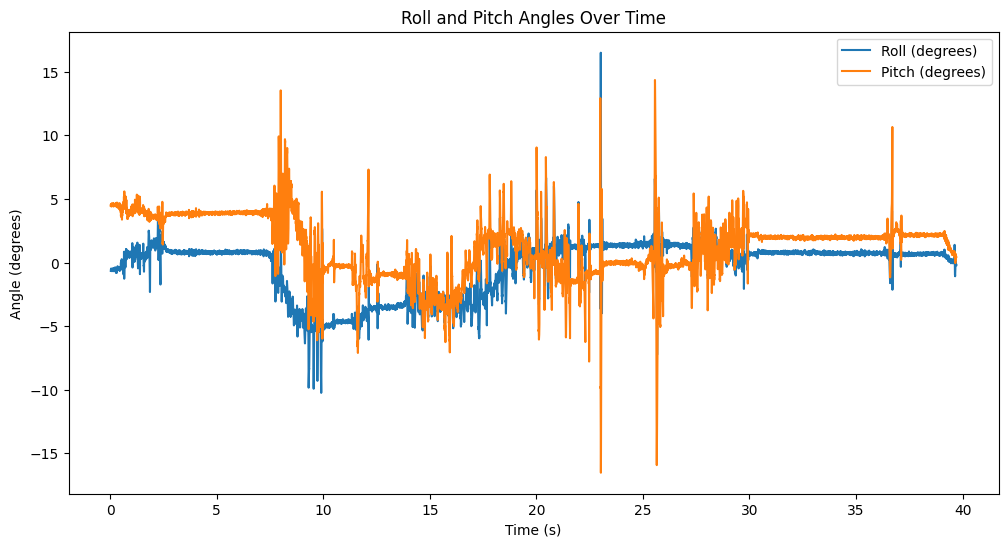

In [44]:
df_accelerometer['Roll'] = np.degrees(np.arctan2(df_accelerometer['Acceleration y (m/s^2)'], df_accelerometer['Acceleration z (m/s^2)']))
df_accelerometer['Pitch'] = np.degrees(np.arctan2(-df_accelerometer['Acceleration x (m/s^2)'], 
                                       np.sqrt(df_accelerometer['Acceleration y (m/s^2)']**2 + df_accelerometer['Acceleration z (m/s^2)']**2)))

plt.figure(figsize=(12, 6))

sns.lineplot(x='Time (s)', y='Roll', data=df_accelerometer, label='Roll (degrees)')
sns.lineplot(x='Time (s)', y='Pitch', data=df_accelerometer, label='Pitch (degrees)')

# Set plot labels and title
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Roll and Pitch Angles Over Time')
plt.legend()
plt.show()

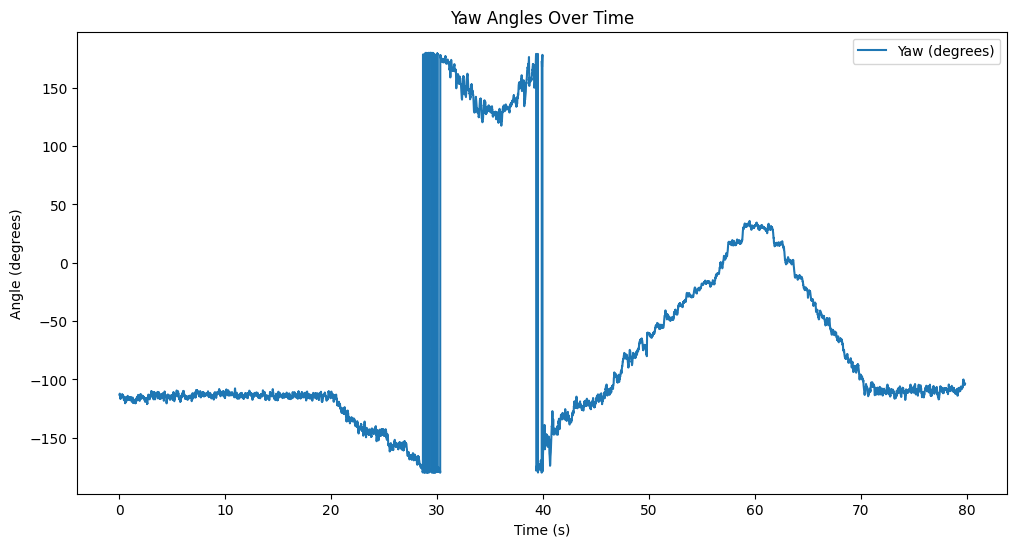

In [45]:
df_accelerometer['Roll'] = np.radians(df_accelerometer['Roll'])
df_accelerometer['Pitch'] = np.radians(df_accelerometer['Pitch'])

df_magnetometer['Yaw'] = np.degrees(np.arctan2(
        df_magnetometer['Magnetic Field z (µT)'] * np.sin(df_accelerometer['Roll']) - df_magnetometer['Magnetic Field y (µT)'] * np.cos(df_accelerometer['Roll']),
        df_magnetometer['Magnetic Field x (µT)'] * np.cos(df_accelerometer['Pitch']) + np.sin(df_accelerometer['Pitch']) * (df_magnetometer['Magnetic Field y (µT)'] * np.sin(df_accelerometer['Roll']) + df_magnetometer['Magnetic Field z (µT)'] * np.cos(df_accelerometer['Roll']))
    ))

plt.figure(figsize=(12, 6))

sns.lineplot(x='Time (s)', y='Yaw', data=df_magnetometer, label='Yaw (degrees)')

# Set plot labels and title
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Yaw Angles Over Time')
plt.legend()
plt.show()